# <span style="color:crimson"> Laboratorio di Simulazione Numerica </span>
## <span style="color:darkorange"> Lezione 9</span>


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Il problema del commesso viaggiatore

Un commesso viaggiatore deve visitare $N$ città una volta sola, tornando sempre al punto di partenza.
Qual è il percorso ottimale?

Supponiamo di avere $N=30$ città distribuite uniformemente:
- dentro ad un quadrato di lato $l=2$
- lungo una circonferenza di raggio $r=1$

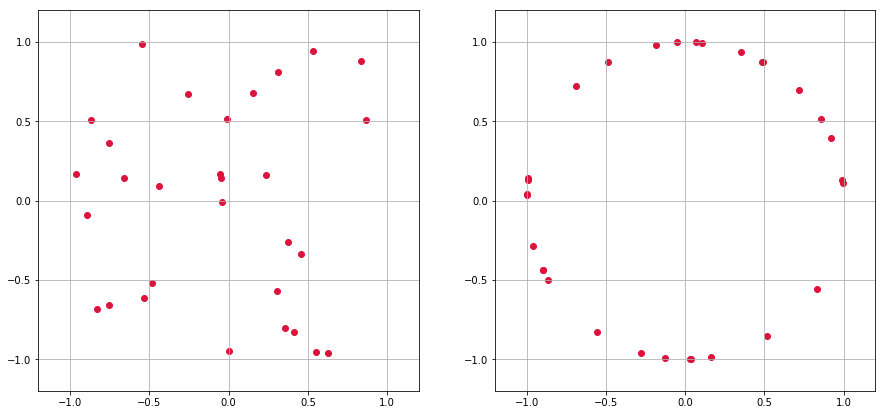

In [2]:
fig = plt.figure(figsize=(15,7))

fig = plt.subplot(1,2,1)
xs, ys = np.loadtxt("Data/square/city_conf.0", usecols=(0,1), unpack='true')
plt.scatter(xs,ys,color='crimson')
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.grid(True)
    
fig = plt.subplot(1,2,2)
xc, yc = np.loadtxt("Data/circle/city_conf.0", usecols=(0,1), unpack='true')
plt.scatter(xc,yc,color='crimson')
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.grid(True)
    
plt.show()

Il percorso ottimale minimizza la funzione costo:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

(con $\vec{x}_{N+1}=\vec{x}_1$)

Viene creata e lasciata evolvere una popolazione di $M=900$ possibili percorsi secondo le seguenti regole:
- Il DNA di ciascun elemento consiste in un vettore di $N$ interi da cui si ricostruisce il percorso attraverso le $N$ città
- La popolazione viene ordinata in base alla funzione costo: i primi elementi sono quelli che percorrono una distanza complessiva minore
- La popolazione viene sostituita totalmente dalla nuova generazione
- Un figlio può essere una copia del genitore oppure può essere generato da un crossover del DNA dei due genitori (con una probabilità fissata del $50\%$)
- I genitori vengono scelti attraverso l'algoritmo: $j=N\times int(r^p)$ dove $j$ è l'indice del genitore nel vettore ordinato della popolazione, $r$ è un numero casuale  $r\in[0,1)$ e $p$ è un numero intero fissato
- Durante la generazione di un figlio possono avvenire delle mutazioni (ciascuna con una probabilità fissata) che alterano il DNA attraverso uno scambio, uno scalamento, una permutazione o un'inversione di $m$ interi del DNA
- Poichè le mutazioni possono alterare in maniera negativa un buon elemento, in ogni generazione viene salvato il miglior individuo che sostituisce il peggior elemento della generazione successiva

La popolazione viene lasciata evolvere per $300$ generazioni con i seguenti parametri:
- $p=3$
- probabilità di crossover: $50\%$
- probabilità di scambio (di due elementi del DNA): $20\%$
- probabilità di shift globale: $50\%$
- probabilità di shift di $m$ elementi $(m \in[3,30) \; casuale)$: $12\,5\%$
- probabilità di permutazione di $m$ elementi contigui $(m \in[2,15) \; casuale)$: $12\,5\%$
- probabilità di inversione di $m$ elementi $(m \in[4,30) \; casuale)$: $12\,5\%$

*Nota:* le mutazioni di shift locale, scambio, permutazione ed inversione sono sufficientemente ergodiche in quanto il numero di elementi e la posizione del DNA in cui avviene la mutazione sono scelti casualmente; il crossover invece avviene sempre tagliando la metà del DNA e dunque, per garantire una maggiore ergodicità dell'evoluzione, viene assegnata un'alta probabilità allo shift globale (che di per sè non modifica il corredo genetico).

*Nota:* una potenza p troppo alta può far convergere troppo velocemente la popolazione verso un buon prototipo di individuo e la bassa ergodicità rende più difficile uscire da un eventuale minimo locale! 

*Nota:* tutte le mutazioni vengono eseguite in *periodic boundary conditions.*

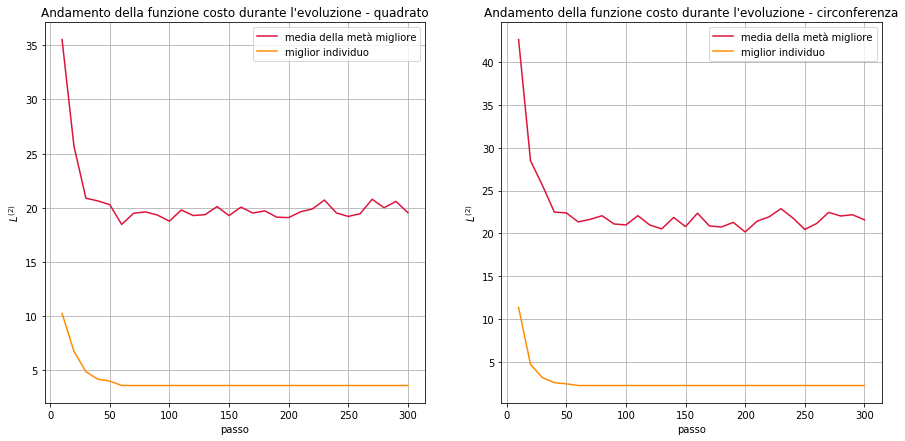

In [3]:
fig = plt.figure(figsize=(15,7))

fig = plt.subplot(1,2,1)
N_step, aves = np.loadtxt("Data/square/average_path_length.dat", usecols=(0,1), unpack='true')
plt.plot(N_step, aves, label='media della metà migliore', color='crimson')
N_step, bests = np.loadtxt("Data/square/best_path_length.dat", usecols=(0,1), unpack='true')
plt.plot(N_step, bests, label='miglior individuo', color='darkorange')
plt.title('Andamento della funzione costo durante l\'evoluzione - quadrato')
plt.xlabel('passo')
plt.ylabel('$L^{(2)}$')
plt.grid(True)
plt.legend()

fig = plt.subplot(1,2,2)
N_step, avec = np.loadtxt("Data/circle/average_path_length.dat", usecols=(0,1), unpack='true')
plt.plot(N_step, avec, label='media della metà migliore', color='crimson')
N_step, bestc = np.loadtxt("Data/circle/best_path_length.dat", usecols=(0,1), unpack='true')
plt.plot(N_step, bestc, label='miglior individuo', color='darkorange')
plt.title('Andamento della funzione costo durante l\'evoluzione - circonferenza')
plt.xlabel('passo')
plt.ylabel('$L^{(2)}$')
plt.grid(True)
plt.legend()

plt.show()

In [4]:
Ns = np.loadtxt("Data/square/best_path_conf.dat", unpack='true')
Ns = np.append(Ns, Ns[0])  #aggiungo punto iniziale alla fine
print('Miglior percorso (quadrato):')
print(Ns)
print('\n' + 'Costo (quadrato):')
print(bests[-1])

Nc = np.loadtxt("Data/circle/best_path_conf.dat", unpack='true')
Nc = np.append(Nc, Nc[0])  #aggiungo punto iniziale alla fine

print('\n' + 'Miglior percorso (circonferenza):')
print(Nc)
print('\n' + 'Costo (circonferenza):')
print(bestc[-1])

Miglior percorso (quadrato):
[ 6. 29.  3. 21.  1. 20. 13.  2. 15. 16. 18. 28. 26.  4. 24. 12.  5. 27.
 10. 23.  8.  7.  9. 25. 17.  0. 11. 14. 19. 22.  6.]

Costo (quadrato):
3.5776

Miglior percorso (circonferenza):
[27. 17.  5. 15. 19.  8.  6.  2. 21. 25. 12. 11.  9. 18. 13. 20.  7.  0.
 14.  1. 23. 22. 29. 28. 16.  3. 10.  4. 26. 24. 27.]

Costo (circonferenza):
2.24714


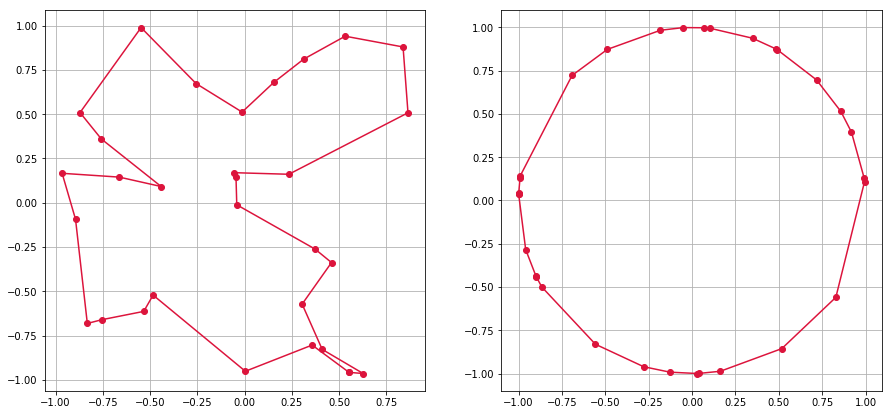

In [5]:
fig = plt.figure(figsize=(15,7))

fig = plt.subplot(1,2,1)
x=[]
y=[]
for i in range(0,31):
    x.append(xs[int(Ns[i])])
    y.append(ys[int(Ns[i])])
plt.plot(x,y,color='crimson',marker='o')
plt.grid(True)

fig = plt.subplot(1,2,2)
x=[]
y=[]
for i in range(0,31):
    x.append(xc[int(Nc[i])])
    y.append(yc[int(Nc[i])])
plt.plot(x,y,color='crimson', marker='o')
plt.grid(True)

plt.show()

*Osservazione:* Il codice era stato precedentemente eseguito sostituendo ad ogni passo i due figli con i due elementi peggiori della popolazione.
Il programma risultava sensibilmente più lento (e meno efficace) poichè l'algoritmo di riordinamento (Quick Sort) doveva essere chiamato ad ogni passo, mentre sostituendo l'intera generazione il QS viene chiamato 1 volta su 450.